# A Machine Learning Example for the Insurance Sector  

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

# Importing Data

In [2]:
insurance_df = pd.read_csv('./insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_df[insurance_df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


There is one duplicated value. It is better to drop it.

In [5]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance_df_no_dupl = insurance_df.drop_duplicates()
insurance_df_no_dupl

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

## Exploring the Target Variable 'charges'  

Before starting with the other variables it is important to analyze the distribution of the 'charges' feature.

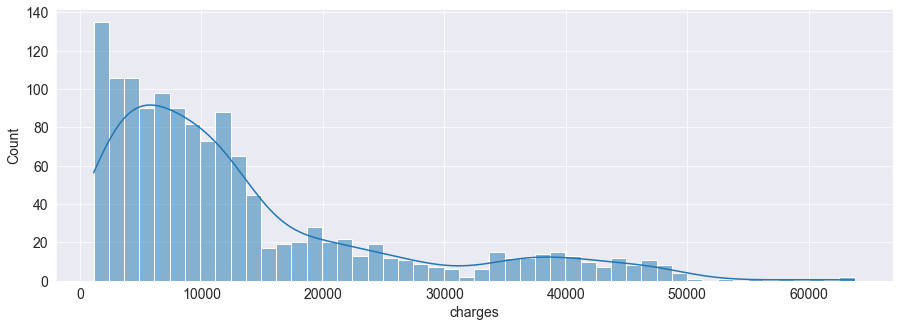

In [7]:
sns.histplot(data=insurance_df_no_dupl, x='charges', bins=50 ,kde=True);

In [8]:
insurance_df_no_dupl.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

The distribution is right-skewed.  
The majority of the fees are concentrated in the range between $0 and $10000. 

## Exploring the Variable Age

In [9]:
insurance_df_no_dupl.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

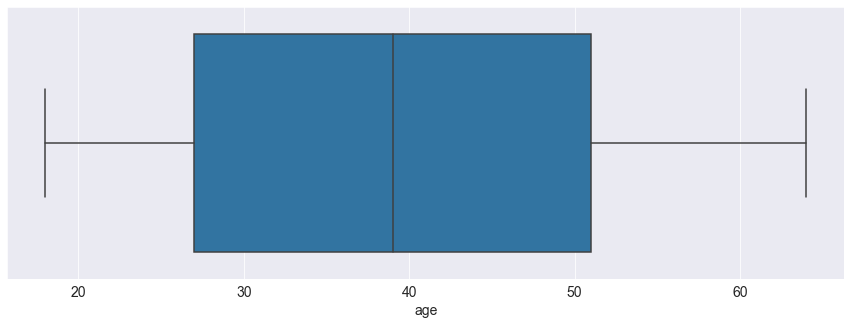

In [10]:
sns.boxplot(data=insurance_df_no_dupl, x='age');

## Exploring the Sex Variable

In [11]:
insurance_df_no_dupl.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

The distribution of sex is balanced. What is the amount of charges paid by sex?

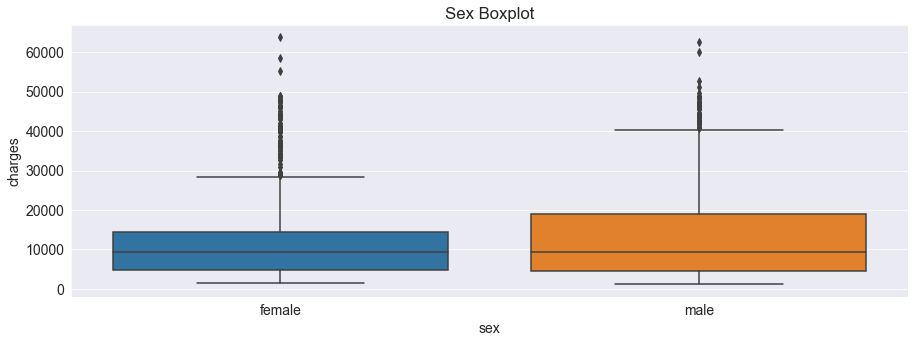

In [12]:
sns.boxplot(data=insurance_df_no_dupl, x='sex', y='charges')
plt.title('Sex Boxplot');

Males seem to pay quite more in charges than females.

In [13]:
insurance_df_no_dupl.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [14]:
females_charges = insurance_df_no_dupl.groupby('sex')['charges'].mean()[0]
male_charges = insurance_df_no_dupl.groupby('sex')['charges'].mean()[1]
male_charges-females_charges

1405.4200199276147

Indeed, on average, males pay $1405.42 more.

A more detailed description of the variable "charges" described by gender.

In [15]:
insurance_df_no_dupl[insurance_df_no_dupl.sex=='male'].charges.describe()

count      675.000000
mean     13974.998864
std      12971.958663
min       1121.873900
25%       4654.022675
50%       9377.904700
75%      19006.685500
max      62592.873090
Name: charges, dtype: float64

In [16]:
insurance_df_no_dupl[insurance_df_no_dupl.sex=='female'].charges.describe()

count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64

## Exploring the BMI Variable

In [17]:
insurance_df_no_dupl.bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

Is there a correlation with "charges" feature?

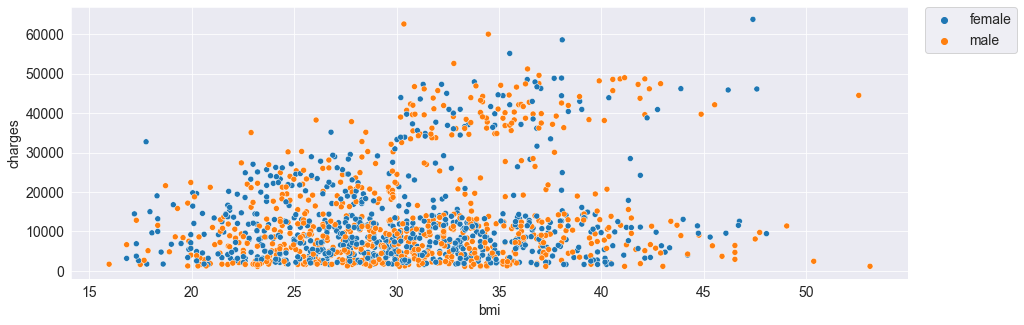

In [18]:
sns.scatterplot(data=insurance_df_no_dupl, x='bmi', y='charges', hue='sex')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

It does not seem to be a strong relationship, but it is positive for sure; moreover there are not two well defined clusters based on sex.

Checking the distribution of the variable BMI.

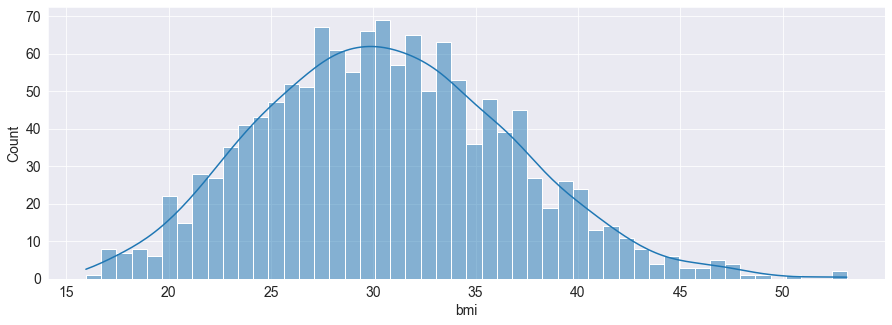

In [19]:
sns.histplot(data=insurance_df_no_dupl, x='bmi', bins=50, kde=True);

The "bmi" variable seems to be normally distributed.

## Exploring the Children Variable

In [20]:
insurance_df_no_dupl.children.describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

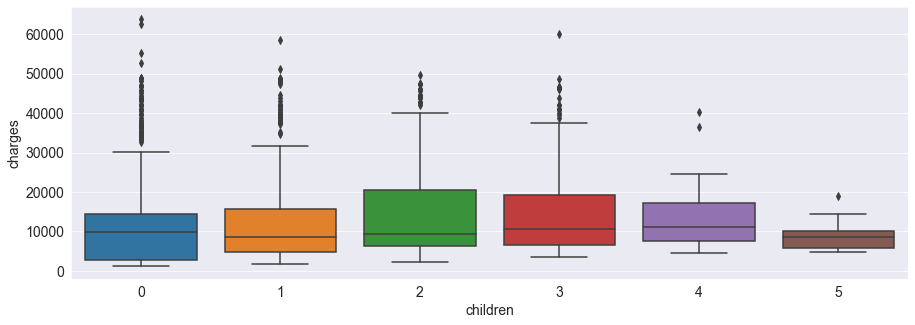

In [21]:
sns.boxplot(data=insurance_df_no_dupl, x='children', y='charges');

In [22]:
insurance_df_no_dupl.groupby('children')['charges'].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

On average, who has 2 or 3 children pays spends more money in charges.

## Exploring the Smoking Variable

In [23]:
insurance_df_no_dupl.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

There are not many smokers in the dataset.

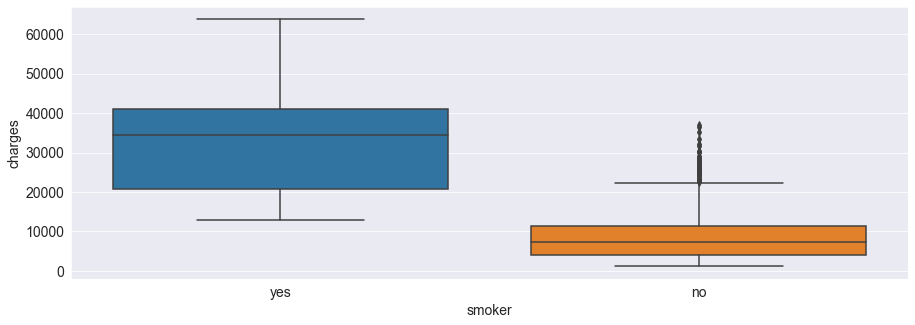

In [24]:
sns.boxplot(data=insurance_df_no_dupl, x='smoker', y='charges');

In general, smokers pay much more in insurance charges than no-smokers.

In [25]:
insurance_df_no_dupl[insurance_df_no_dupl.smoker=='yes'].charges.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [26]:
insurance_df_no_dupl[insurance_df_no_dupl.smoker=='no'].charges.describe()

count     1063.000000
mean      8440.660307
std       5992.973800
min       1121.873900
25%       3988.883500
50%       7345.726600
75%      11363.019100
max      36910.608030
Name: charges, dtype: float64

What is, on average, the amount paid by smokers and non-smokers?

In [27]:
insurance_df_no_dupl.groupby('smoker')['charges'].mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

## Exploring the Region Variable

In [28]:
insurance_df_no_dupl.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

Regions are almost perfectly balanced, only the southeast region appears more times.

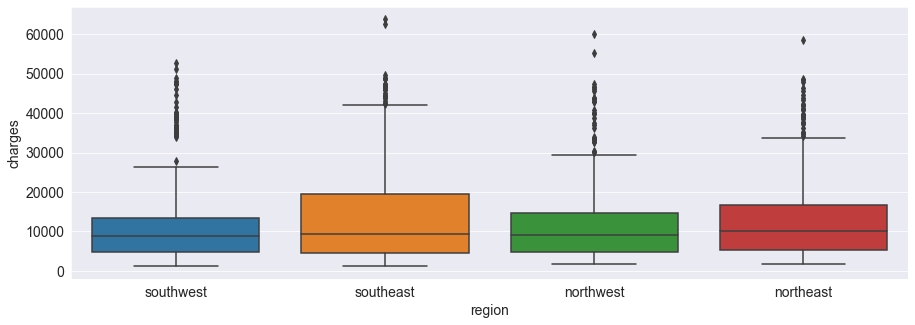

In [29]:
sns.boxplot(data=insurance_df_no_dupl, x='region', y='charges');

It does not seem to be a large difference between them. Only the southeast region has more outliers.

# Feature Engineering  

In this section are performed all the necessary steps to transform variables that will be used in the machine learning model.

## Defining Inputs and Target

In [30]:
input_df = insurance_df_no_dupl.drop(columns='charges')
target_df = insurance_df_no_dupl.charges

Showing the results

In [31]:
input_df

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [32]:
target_df

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

## Creating a Variable to Cluster the BMI  

It will be added a new feature to cluster observations on their BMI values.  
These are the different ranges:  
- If BMI is less than 18.5, it falls within the underweight range.  
- If BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.  
- If BMI is 25.0 to 29.9, it falls within the overweight range.  
- If BMI is 30.0 or higher, it falls within the obese range.  

In [33]:
def bmi_estimator(column):
    if column < 18.5:
        return 'underweight'
    elif (column >= 18.5) and (column<=24.9):
        return 'healthy weight'
    elif (column>=25) and (column<=29.9):
        return 'overweight'
    else:
        return 'obese'

In [34]:
input_df['bmi_class']=input_df.bmi.map(bmi_estimator)
input_df

,age,sex,bmi,children,smoker,region,bmi_class
0,19,female,27.900,0,yes,southwest,overweight
1,18,male,33.770,1,no,southeast,obese
2,28,male,33.000,3,no,southeast,obese
3,33,male,22.705,0,no,northwest,healthy weight
4,32,male,28.880,0,no,northwest,overweight
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,obese
1334,18,female,31.920,0,no,northeast,obese
1335,18,female,36.850,0,no,southeast,obese
1336,21,female,25.800,0,no,southwest,overweight


## Encoding Sex and Smoking Variables  


In [35]:
sex_dict = {'male':0, 'female':1}
smoker_dict = {'no':0, 'yes':1}

input_df['sex'] = input_df.sex.map(sex_dict)
input_df['smoker'] = input_df.smoker.map(smoker_dict)

## Encoding the Region Variable  

It is used the one-hot encoding procedure.

In [36]:
columns_to_encode = ['region', 'bmi_class']

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(input_df[columns_to_encode])

encoded_cols = list(encoder.get_feature_names_out(columns_to_encode))

input_df[encoded_cols] = encoder.transform(input_df[columns_to_encode])

In [38]:
input_df = input_df.drop(columns='region')
input_df

,age,sex,bmi,children,smoker,bmi_class,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,19,1,27.900,0,1,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,0,33.770,1,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,0,33.000,3,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,0,22.705,0,0,healthy weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,0,28.880,0,0,overweight,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,obese,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,obese,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,18,1,36.850,0,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,21,1,25.800,0,0,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Scaling Values  

Values will be scaled by using MinMax Scaler.

In [39]:
columns_to_scale = ['age','bmi','children']
input_df[columns_to_scale].head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(input_df[columns_to_scale])

input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])

In [41]:
input_df = input_df.drop(columns='bmi_class')
input_df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,1,0.321227,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0,0.479150,0.2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0,0.458434,0.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0,0.181464,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0,0.347592,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
input_df.describe().loc[['min','max']]

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


All the variables range now between 0 and 1.

## Splitting the Input Data Frame into a Train and Validation One

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(input_df, target_df, test_size=0.2, random_state=42)

Showing the result.

In [44]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
1114,0.108696,0,0.230024,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
968,0.065217,0,0.263250,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
599,0.739130,1,0.580172,0.4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
170,0.978261,0,0.686306,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
275,0.630435,1,0.286252,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.717391,1,0.511165,0.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1131,0.195652,0,0.805488,0.4,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1295,0.043478,0,0.162497,0.2,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
861,0.434783,1,0.323917,0.6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
X_val

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
900,0.673913,0,0.176352,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1064,0.239130,1,0.259349,0.8,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1256,0.717391,1,0.549502,0.6,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.282609,0,0.495830,0.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
237,0.282609,0,0.603444,0.4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.000000,0,0.659672,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
542,0.978261,1,0.547215,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
760,0.086957,1,0.500942,0.4,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1284,0.934783,0,0.547215,0.2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [46]:
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [47]:
y_val

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

# Creating the Model  

It will be used the XGBRegressor model

In [48]:
from xgboost import XGBRegressor

In [49]:
model = XGBRegressor(n_jobs=-1, n_estimators=1000, early_stopping_rounds=50, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val,y_val)])

[0]	validation_0-rmse:12740.82085	validation_1-rmse:14354.43509
[1]	validation_0-rmse:9486.62138	validation_1-rmse:10616.10467
[2]	validation_0-rmse:7287.93828	validation_1-rmse:8240.67071
[3]	validation_0-rmse:5864.49266	validation_1-rmse:6655.85239
[4]	validation_0-rmse:4970.66799	validation_1-rmse:5662.25928
[5]	validation_0-rmse:4397.13963	validation_1-rmse:5106.75982
[6]	validation_0-rmse:4057.24959	validation_1-rmse:4771.82219
[7]	validation_0-rmse:3822.63958	validation_1-rmse:4610.10440
[8]	validation_0-rmse:3645.34812	validation_1-rmse:4541.40784
[9]	validation_0-rmse:3512.55671	validation_1-rmse:4492.49500
[10]	validation_0-rmse:3375.72474	validation_1-rmse:4488.07927
[11]	validation_0-rmse:3311.14597	validation_1-rmse:4474.10073
[12]	validation_0-rmse:3222.20924	validation_1-rmse:4471.14367
[13]	validation_0-rmse:3123.12721	validation_1-rmse:4490.20394
[14]	validation_0-rmse:3050.29756	validation_1-rmse:4498.37645
[15]	validation_0-rmse:3030.27200	validation_1-rmse:4494.12635

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

# Checking the Importance of Each Feature

In [50]:
feature_importance_df = pd.DataFrame({
    'Feature':input_df.columns,
    'Importance':model.feature_importances_
})

feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
4,smoker,0.903173
2,bmi,0.020471
0,age,0.016071
9,bmi_class_healthy weight,0.012697
10,bmi_class_obese,0.007735
3,children,0.007344
6,region_northwest,0.007163
11,bmi_class_overweight,0.006668
8,region_southwest,0.005663
7,region_southeast,0.005130


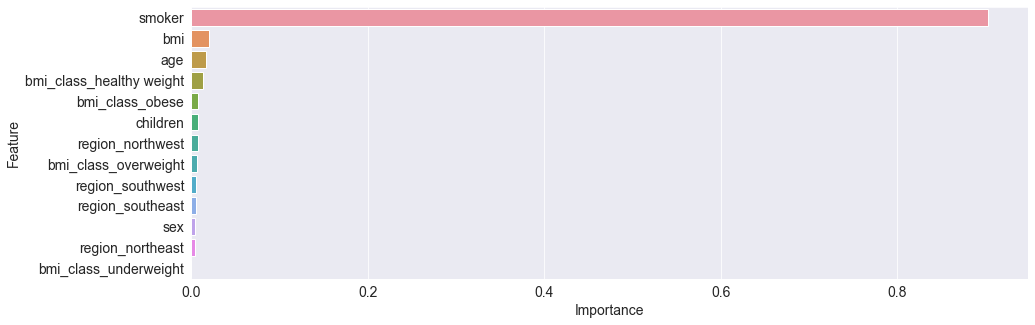

In [51]:
sns.barplot(data=feature_importance_df.sort_values('Importance', ascending=False), y='Feature', x='Importance');

The smoker feature appears to be the most important one in determining the charges.

To check the best number of trees.

In [52]:
model.best_ntree_limit

13

13 is the best number of trees use in the model.

Checking the R^2 score for train and validation sets.

In [53]:
from sklearn.metrics import r2_score

print('The R^2 Score for the Training Set is: {}'.format(r2_score(y_train, model.predict(X_train))))
print('The R^2 Score for the Validation Set is: {}'.format(r2_score(y_val, model.predict(X_val))))

The R^2 Score for the Training Set is: 0.92416713065968
The R^2 Score for the Validation Set is: 0.8912083506265275


Since it ranges from 0 to 1, where 0 is the minimum and 1 the maximum, the model seems to work properly.  

Moreover, another way to check the goodness of a model is by performing NRMSE = RMSE/(y_max-y_min) --> https://www.statology.org/what-is-a-good-rmse/  

The closer to 0 the better.

In [54]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)

nrmse = rmse/(max(target_df)-min(target_df))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))

The RMSE is: 4471.143622095877
The NRMSE is: 0.07136866421921444


Now it is better to check some examples of the difference between the predicted and the actual values.

In [55]:
y_pred = model.predict(X_val)
y_pred[:10]

array([ 9457.824 ,  5656.2124, 13328.179 , 37901.95  ,  5033.9526,
        9560.842 , 37780.    ,  2835.1318,  8372.604 , 10332.222 ],
      dtype=float32)

In [56]:
y_val[:10]

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
481      9304.70190
240     38511.62830
277      2150.46900
415      7345.72660
707     10264.44210
Name: charges, dtype: float64

The predictions, except certain cases, do not seem to be so far from reality.

# Hyperparameter Tuning  

In this section are provided some techniques to improve the score of the model.  

The hyperparameters can be found here: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

## Max Depth

In [57]:
def optimal_max_depth(number):
    max_depth_model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=number ,random_state=42)
    max_depth_model.fit(X_train, y_train)
    train_rmse = mean_squared_error(y_train, max_depth_model.predict(X_train), squared=False)
    val_rmse = mean_squared_error(y_val, max_depth_model.predict(X_val), squared=False)
    return {'Max_Depth':number, 'Train_Rmse':train_rmse, 'Validation_Rmse':val_rmse}

In [58]:
max_depth_df = pd.DataFrame([optimal_max_depth(number) for number in range(1,10)]).sort_values('Validation_Rmse')
max_depth_df.head()

,Max_Depth,Train_Rmse,Validation_Rmse
2,3,4264.770476,4251.996995
3,4,4038.957467,4280.987639
4,5,3674.277444,4356.719852
1,2,4458.462012,4405.776079
5,6,3222.209225,4471.143622


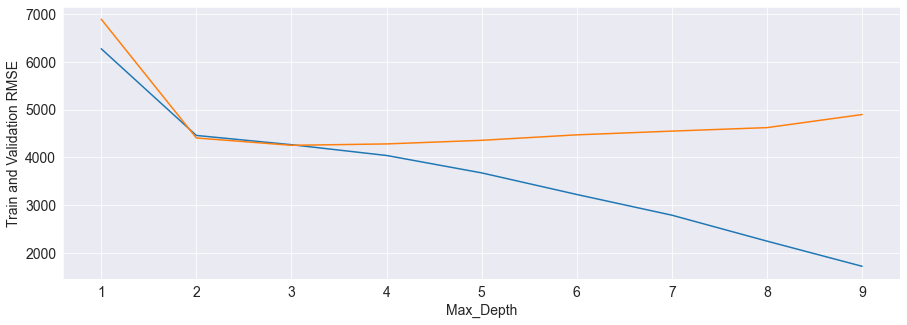

In [59]:
sns.lineplot(data=max_depth_df, x='Max_Depth', y='Train_Rmse')
sns.lineplot(data=max_depth_df, x='Max_Depth', y='Validation_Rmse')
plt.ylabel('Train and Validation RMSE');

At "max_depth"=3 the validation rmse starts increasing.

## Learning Rate  

In [60]:
def optimal_learning_rate(number):
    model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=3, learning_rate=number, random_state=42)
    model.fit(X_train, y_train)
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    val_rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)
    return {'Learning_Rate':number, 'Train_Rmse':train_rmse, 'Validation_Rmse':val_rmse}

In [61]:
learning_rate_df = pd.DataFrame([optimal_learning_rate(number) for number in np.arange(0.1,1,0.05)]).sort_values('Validation_Rmse')
learning_rate_df.head()

,Learning_Rate,Train_Rmse,Validation_Rmse
5,0.35,4217.498960,4238.039332
8,0.50,4097.225842,4244.259593
9,0.55,4008.885655,4247.309357
4,0.30,4264.770476,4251.996995
7,0.45,4131.279452,4257.320246


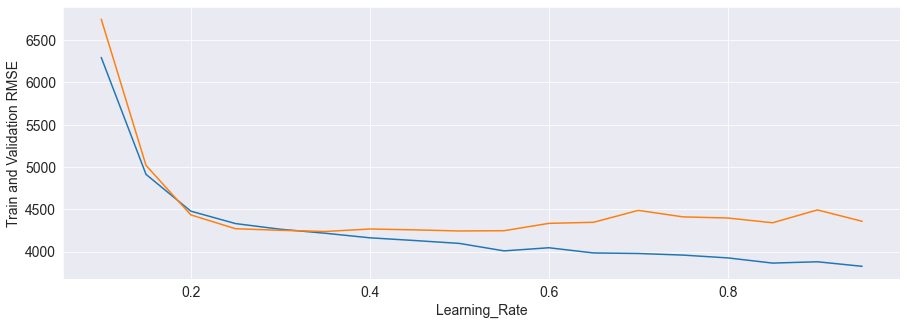

In [62]:
sns.lineplot(data=learning_rate_df, x='Learning_Rate', y='Train_Rmse')
sns.lineplot(data=learning_rate_df, x='Learning_Rate', y='Validation_Rmse')
plt.ylabel('Train and Validation RMSE');

0.35 is the best value.

## Min Child Weight  

In [63]:
def optimal_child_weight(number):
    model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=3, learning_rate=0.35, min_child_weight=number ,random_state=42)
    model.fit(X_train, y_train)
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    val_rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)
    return {'Min_Child_Weight':number, 'Train_Rmse':train_rmse, 'Validation_Rmse':val_rmse}

In [64]:
child_weight_df = pd.DataFrame([optimal_child_weight(number) for number in range(0,10)]).sort_values('Validation_Rmse')
child_weight_df.head()

,Min_Child_Weight,Train_Rmse,Validation_Rmse
8,8,4248.802687,4187.605787
9,9,4246.365003,4199.642400
7,7,4245.259970,4201.440936
2,2,4223.506507,4222.713290
3,3,4233.919525,4235.137942


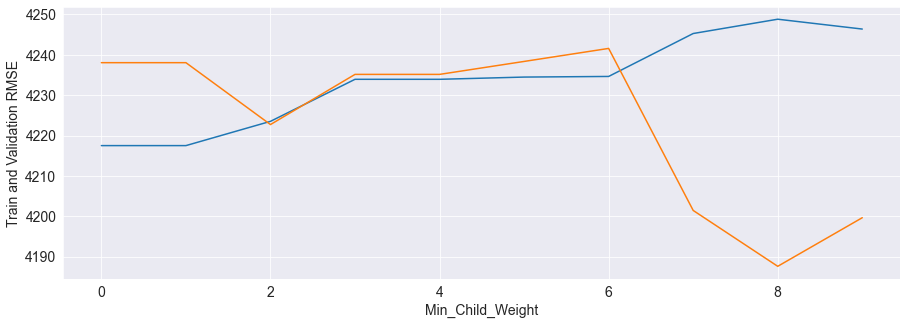

In [65]:
sns.lineplot(data=child_weight_df, x='Min_Child_Weight', y='Train_Rmse')
sns.lineplot(data=child_weight_df, x='Min_Child_Weight', y='Validation_Rmse')
plt.ylabel('Train and Validation RMSE');

At level 8 the rmse decreases a lot.

# Creating a New Model

In [66]:
final_model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=3, learning_rate=0.35, min_child_weight=8, random_state=42)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.35, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=8,
             missing=nan, monotone_constraints='()', n_estimators=13, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

Checking new scores.

In [67]:
print('The R^2 Score for the Training Set is: {}'.format(r2_score(y_train, final_model.predict(X_train))))
print('The R^2 Score for the Validation Set is: {}'.format(r2_score(y_val, final_model.predict(X_val))))

The R^2 Score for the Training Set is: 0.8681490868783452
The R^2 Score for the Validation Set is: 0.9045689059547112


The R^2 score of the validation set has improved.

In [68]:
rmse = mean_squared_error(y_val, final_model.predict(X_val), squared=False)

nrmse = rmse/(max(target_df)-min(target_df))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))

The RMSE is: 4187.605787188936
The NRMSE is: 0.0668428161939097


The rmse and the nrmse have decreased, the hyperparameter tuning was completed successfully. 

# Making Predictions on New Inputs

In [80]:
def make_new_predictions(single_input):
    single_input_df = pd.DataFrame([single_input])
    single_input_df['bmi_class']=single_input_df.bmi.map(bmi_estimator)
    single_input_df['sex'] = single_input_df.sex.map(sex_dict)
    single_input_df['smoker'] = single_input_df.smoker.map(smoker_dict)
    single_input_df[encoded_cols] = encoder.transform(single_input_df[columns_to_encode]) 
    single_input_df[columns_to_scale] = scaler.transform(single_input_df[columns_to_scale])
    single_input_df = single_input_df.drop(columns=['region', 'bmi_class'])
    pred = final_model.predict(single_input_df)[0]
    return 'The charge is: ${}'.format(pred)
    

In [70]:
new_input = {
    'age':23,
    'sex':'male',
    'bmi':28.1,
    'children':0,
    'smoker':'no',
    'region':'northwest'
}

In [81]:
make_new_predictions(new_input)

'The charge is: $4507.5537109375'

# Extra: Using an Artificial Neural Network

In [ ]:
import tensorflow as tfl
from tensorflow import keras

In [247]:
ann = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

ann.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tfl.keras.metrics.RootMeanSquaredError()]
)

ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 1023015744.0000 - root_mean_squared_error: 31984.6172
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 176589888.0000 - root_mean_squared_error: 13288.7129
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 147162272.0000 - root_mean_squared_error: 12131.0459
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 139552272.0000 - root_mean_squared_error: 11813.2246
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 137603088.0000 - root_mean_squared_error: 11730.4346
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 137115984.0000 - root_mean_squared_error: 11709.6533
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 136999296.0000 - root_mean_squared_error: 11704.6699
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 136994272.0000 - root_mean_squared_error: 11

It does not seem to perform so well in this case, for sure it needs further implementation. 